## Classification Models

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('../../../Data/Credit_card_data.csv', index_col = 0)

In [4]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [5]:
import statsmodels.api as sm

X = data.drop(['default.payment.next.month'], axis = 1)
X = sm.add_constant(X)
y = data['default.payment.next.month']

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### 1. Logit

1958년 영국의 통계학자 Cox가 제안한 확률 모형으로써, 독립변수의 선형 결합을 이용하여 사건의 **발생 가능성**을 예측하는 데 사용되는 통계 기법이다. 독립 변수의 선형 결합으로 종속변수를 설명하는 관점에서는 선형 회귀 분석과 유사하지만, 종속변수가 범주형 데이터를 대상으로 한다는 점에서 분류 모형이라고 할 수 있다

Logit Model은 종속변수 $Y_i$가 1의 값을 갖는 확률 $p_i$를 아래와 같이 가정한다

$$p_i = E(Y_i) = \frac{1}{1+e^{-\mathbf{\beta X_i}}}$$

이진 분류 모형의 경우 아래와 같이 분류를 생각해볼 수 있다

$$p(Y_i = 1) = p_i = \frac{1}{1+e^{-\mathbf{\beta X_i}}} = \frac{e^{\mathbf{\beta X_i}}}{1+e^{\mathbf{\beta X_i}}$$

$$p(Y_i = 0) = 1 - p_i = \frac{1e^{-\mathbf{\beta X_i}}}{1+e^{-\mathbf{\beta X_i}}} = \frac{1}{1+e^{\mathbf{\beta X_i}}$$

추정된 $\hat{p_i}$는 각각 1인 확률과 0인 확률을 추정한다. 여기서 추정된 확률이 0.5보다 크면 1을, 0.5보다 작으면 0으로 처리하는 분류 모형을 고려할 수 있다

odds ratio는 어떤 사건이 일어날 확률을 사건이 일어나지 않을 확률로 나눈 것으로, 아래와 같이 나타낼 수 있다

$$\mathrm{odds} = \frac{p_i}{1-p_i} = e^{\mathbf{\beta X_i}}$$

odds ratio는 상대위험도의 척도로써 다양한 곳에서 사용되니 알아두면 좋다


In [7]:
logit_model = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.465018
         Iterations 7


In [8]:
print(logit_model.summary())

                               Logit Regression Results                               
Dep. Variable:     default.payment.next.month   No. Observations:                21000
Model:                                  Logit   Df Residuals:                    20976
Method:                                   MLE   Df Model:                           23
Date:                        Thu, 13 Mar 2025   Pseudo R-squ.:                  0.1230
Time:                                00:30:35   Log-Likelihood:                -9765.4
converged:                               True   LL-Null:                       -11136.
Covariance Type:                    nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7131      0.143     -5.002      0.000      -0.993      -0.434
LIMIT_BAL  -8.285e-07   1.88e-07     -4.396      0.000    -1.2e-06 

In [9]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred_prob = logit_model.predict(X_test)
y_pred = (logit_model.predict(X_test) > 0.5).astype(int)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      7040
           1       0.68      0.23      0.35      1960

    accuracy                           0.81      9000
   macro avg       0.75      0.60      0.62      9000
weighted avg       0.79      0.81      0.77      9000



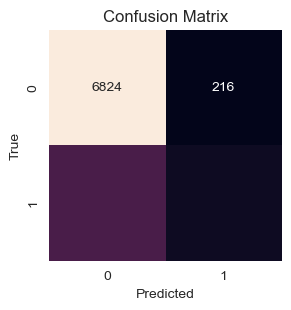

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (3, 3))
sns.heatmap(cm, annot = True, fmt = 'd', cbar = False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Model이 얼마나 잘 분류했는지를 보는 과정 중 가장 유명한 것은 위와같이 **혼동 행렬(Confusion Matrix)** 를 보는 것이다. 혼동 행렬은 아래와 같이 나타낸다

<center>

|                     | Predicted positive | Predicted negative |
|:-------------------:|:------------------:|:------------------:|
| **Actual positive** |   True Positive    |   False negative   |
| **Actual negative** |   False positive   |   True Negative    |

</center>


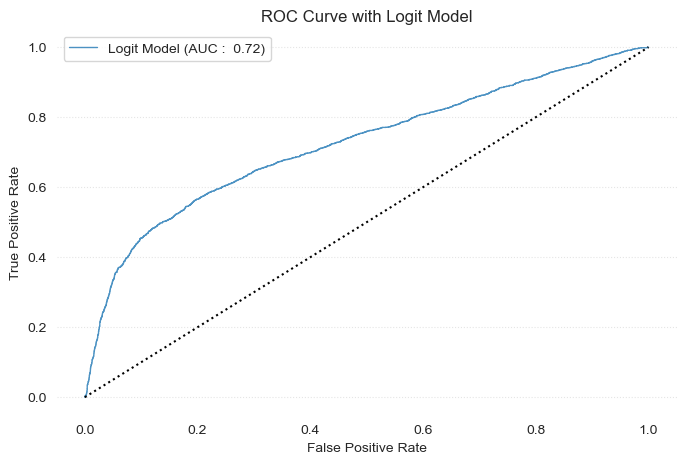

In [11]:
from sklearn.metrics import roc_auc_score, classification_report, roc_curve
from sklearn.metrics import auc

y_pred_prob = logit_model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

fig, ax = plt.subplots(figsize = (8, 5))
ax.plot(fpr, tpr, label = f'Logit Model (AUC : {roc_auc : .2f})', alpha = 0.8, lw = 1)
ax.plot([0, 1], [0, 1], 'k:')
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 
plt.legend()
plt.title('ROC Curve with Logit Model')
plt.show()

### 2. Probit

Probit Model은 종속변수 $Y_i$기 1의 값을 갖는 확률이 다음과 같이 계산되는 모형이다

$$p_i = \int_{- \infty}^{\mathbf{\beta X_i}} \frac{1}{\sqrt{2\pi}} e^{-0.5\epsilon^2} d \epsilon \equiv \Phi (\mathbf{\beta X_i})$$

여기서 $\Phi (\mathbf{\beta X_i})$는 표준정규분포의 누정분포함수를 나타내며, Logit Model과 같이 0과 1 사이의 값을 가지는 확률을 추정한다

한편, 모형의 parameter는 일반적인 선형모델처럼 바로 구할 수는 없으며, Maximum Likelihood Extimation을 사용하여 구할 수 있다. 

Logit Model과 Probit Model 모두 고전적인 통계 모형에서 분류 모형에 해당하는 것으로, sklearn에서는 `Logistic Regression`이 같은 역할을 한다

In [12]:
probit_model = sm.Probit(y_train, X_train).fit()

print(probit_model.summary())

Optimization terminated successfully.
         Current function value: 0.468599
         Iterations 6
                              Probit Regression Results                               
Dep. Variable:     default.payment.next.month   No. Observations:                21000
Model:                                 Probit   Df Residuals:                    20976
Method:                                   MLE   Df Model:                           23
Date:                        Thu, 13 Mar 2025   Pseudo R-squ.:                  0.1163
Time:                                00:31:15   Log-Likelihood:                -9840.6
converged:                               True   LL-Null:                       -11136.
Covariance Type:                    nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4699      0.081     -5.804 

In [13]:
y_pred_prob = probit_model.predict(X_test)
y_pred = (probit_model.predict(X_test) > 0.5).astype(int)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.97      0.89      7040
           1       0.68      0.20      0.30      1960

    accuracy                           0.80      9000
   macro avg       0.75      0.59      0.60      9000
weighted avg       0.78      0.80      0.76      9000



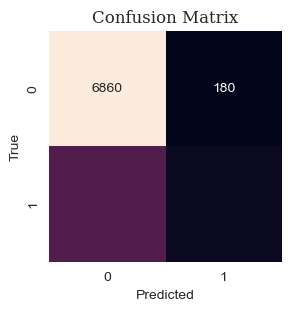

In [14]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (3, 3))
sns.heatmap(cm, annot = True, fmt = 'd', cbar = False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix', fontsize = 12, fontfamily = 'Serif')
plt.show()

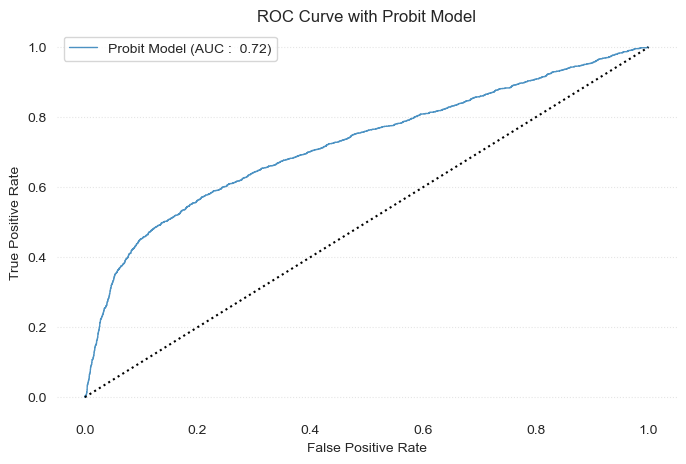

In [15]:
y_pred_prob = probit_model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

fig, ax = plt.subplots(figsize = (8, 5))
ax.plot(fpr, tpr, label = f'Probit Model (AUC : {roc_auc : .2f})', alpha = 0.8, lw = 1)
ax.plot([0, 1], [0, 1], 'k:')
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 
plt.legend()
plt.title('ROC Curve with Probit Model')
plt.show()

### 3. Naive Bayes

모형의 이름에서 볼 수 있듯이 굉장히 Naive한 모형이다. discrete, continuous한 feature들 모두 사용이 가능하며, sklearn에는 다음과 같은 모형이 존재한다

**Discrete Naive Bayes Algorithms**

- `sklearn.naive_bayes.BernoulliNB` : 이진(0 또는 1) 값을 갖는 특성에 적합하다. 텍스트 분류에서 단어의 출현 여부를 이진 특성으로 다룰 때 유용하다고 한다
- `sklearn.naive_bayes.MultinomialNB` : 주로 텍스트 분류 작업에 사용된다. 이 모델은 특성이 다항 분포를 따른다고 가정한다
- `sklearn.naive_bayes.ComplementNB` : 데이터의 분포가 불균형할 때 좋다
- `sklearn.naive_bayes.CategoricalNB` : Categorical Distribution을 가정한다. 성능에 대해서는 그리 많이 알려져 있지 않다

**Continuous Naive Bayes Algorithm**

- `sklearn.naive_bayes.GaussianNB` : 연속적인 값에서 Naive Bayes Classification이 가능하다

그 중 Gaussian Naive Bayes 모형은 feature가 연속적인 경우에 사용되며, 패턴 인식에 큰 장점을 보인다. 무엇보다도, 연산 속도가 타 분류 모형에 비해 굉장히 빠르다는 것이 큰 장점이다

```
sklearn.naive_bayes.GaussianNB(*, priors=None, var_smoothing=1e-09)
```

단 데이터의 특성이 지수 분포족에 따를 때에만 성능이 좋고, feature간에 조건부독립성이 성립하지 않는다면 분류 결과가 치우쳐질 가능성이 높다

#### 3.1 Bayes' Theorem

나이브 베이즈 분류기는 베이즈 정리를 기반으로 동작한다. 베이즈 정리는 다음과 같이 표현된다

$$P(C_k | X) = \frac{P(X | C_k) P(C_k)}{P(X)}$$

여기서

- $P(C_k | X)$는 주어진 데이터 $X$가 클래스 $C_k$에 속할 조건부 확률 (Posterior)
- $P(X | C_k)$는 클래스 $C_k$에서 데이터 $X$가 나올 조건부 확률 (Likelihood)
- $P(C_k)$는 클래스 $C_k$에 대한 사전 확률
- $P(X)$는 데이터 $X$의 전체 확률 (증거)
나이브 베이즈 분류기의 목표는 사후 확률 $P(C_k | X)$를 계산하는 것이다. 사후 확률은 주어진 데이터가 특정 클래스에 속할 확률을 나타낸다.

#### 3.2 Conditional Identification

나이브 베이즈 분류기의 핵심 가정은 조건부 독립성이다. 즉, 모든 특성 $x_i$는 독립적으로 클래스 $C_k$에 영향을 미친다고 가정한다. 이 가정에 따르면, 데이터 $X = {x_1, x_2, \dots, x_n}$의 각 특성 $x_i$는 서로 독립적이다. 따라서, 조건부 확률 $P(X | C_k)$는 각 특성의 조건부 확률의 곱으로 표현할 수 있다.

$$P(X | C_k) = P(x_1, x_2, \dots, x_n | C_k) = \prod_{i=1}^{n} P(x_i | C_k)$$

이 식은 데이터의 각 특성이 서로 독립적이라는 가정을 기반으로 한다. 이를 통해 계산이 단순화된다.

#### 3.3 Posterior Probability

이제 베이즈 정리에 이 조건부 독립성 가정을 적용하여, 사후 확률 $P(C_k | X)$를 다음과 같이 다시 쓸 수 있다

$$P(C_k | X) = \frac{P(C_k) \prod_{i=1}^{n} P(x_i | C_k)}{P(X)}$$

여기서 $P(X)$는 모든 클래스에 대해 동일하므로, 이를 생략하고 사후 확률은 다음과 같이 비례식으로 표현할 수 있다

$$P(C_k | X) \propto P(C_k) \prod_{i=1}^{n} P(x_i | C_k)$$

따라서, 나이브 베이즈 분류기는 사전 확률 $P(C_k)$와 각 특성 $x_i$가 주어진 클래스 $C_k$에 속할 조건부 확률 $P(x_i | C_k)$의 곱을 계산하여, 각 클래스의 사후 확률을 구하게 된다.

#### 3.4 Classification Criterion

나이브 베이즈 분류기는 각 클래스의 사후 확률을 비교하여 가장 큰 확률을 가지는 클래스를 선택한다. 즉, 다음과 같은 방식을 따른다

$$\hat{C} = \arg\max_{C_k} P(C_k) \prod_{i=1}^{n} P(x_i | C_k)$$

이 식에서

- $\hat{C}$는 사후 확률이 가장 큰 클래스를 나타낸다.
- MAP (Maximum A Posteriori) 추정 방식에 따라, 가장 큰 사후 확률을 가지는 클래스를 선택한다.

나이브 베이즈의 조건부 독립성 가정은 계산을 단순화하지만, 실제 데이터에서 특성 간에 상관관계가 존재하는 경우 이 가정이 잘 맞지 않을 수 있다. 그럼에도 불구하고, 나이브 베이즈는 많은 경우에서 효율적이고 성능이 좋은 분류기로 널리 사용된다.

In [16]:
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [17]:
y_pred = naive_bayes.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.37777777777777777


In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.24      0.37      7040
           1       0.24      0.88      0.38      1960

    accuracy                           0.38      9000
   macro avg       0.56      0.56      0.38      9000
weighted avg       0.74      0.38      0.38      9000



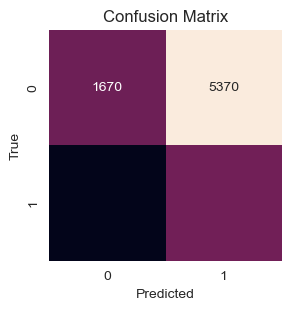

In [19]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (3, 3))
sns.heatmap(cm, annot = True, fmt = 'd', cbar = False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

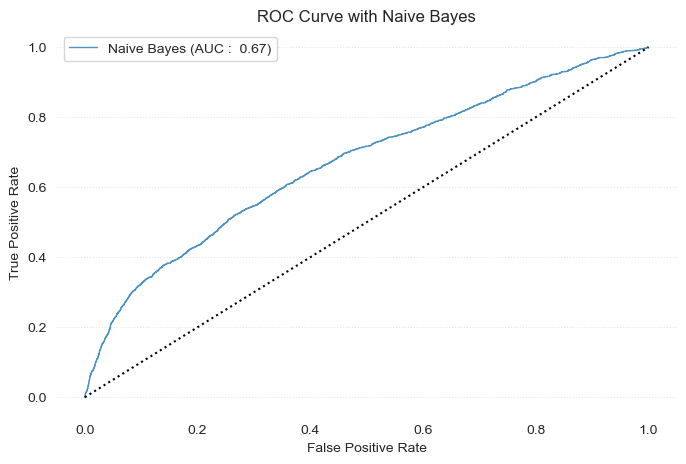

In [20]:
y_prob = naive_bayes.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

fig, ax = plt.subplots(figsize = (8, 5))
ax.plot(fpr, tpr, label = f'Naive Bayes (AUC : {roc_auc : .2f})', alpha = 0.8, lw = 1)
ax.plot([0, 1], [0, 1], 'k:')
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 
plt.legend()
plt.title('ROC Curve with Naive Bayes')
plt.show()